# Boston House Price Prediction

This project was started as a motivation for learning Machine Learning Algorithms and to learn the different data preprocessing techniques such as Exploratory Data Analysis, Feature Engineering, Feature Selection, Feature Scaling and finally to build a machine learning model.

In this project we will predicts house price in boston city

The dataset is collected from [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices/kernels). Let's get into the data and know more about it.

# About the Dataset
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive [Data](http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978`.

## Dataset Naming
The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted.

## Miscellaneous Details
- **Origin**
    - The origin of the boston housing data is Natural.
- **Usage**
    - This dataset may be used for Assessment.
- **Number of Cases**
    - The dataset contains a total of 506 cases.
- **Order**
    - The order of the cases is mysterious.
- **Variables**
    There are 14 attributes in each case of the dataset. They are:
    1. CRIM - per capita crime rate by town
    2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS - proportion of non-retail business acres per town.
    4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    5. NOX - nitric oxides concentration (parts per 10 million)
    6. RM - average number of rooms per dwelling
    7. AGE - proportion of owner-occupied units built prior to 1940
    8. DIS - weighted distances to five Boston employment centres
    9. RAD - index of accessibility to radial highways
    10. TAX - full-value property-tax rate per 10,000 dollars.
    11. PTRATIO - pupil-teacher ratio by town
    12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT - % lower status of the population
    14. MEDV - Median value of owner-occupied homes in 1000's dollars

- **Note**
    - Variable #14 seems to be censored at 50.00 (corresponding to a median price of 50,000 dollars); Censoring is suggested by the fact that the highest median price of exactly 50,000 dollars is reported in 16 cases, while 15 cases have prices between 40,000 dollars and 50,000 dollars, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

In [6]:
# Import Essential Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sb

# Setting Seaborn Style
sb.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Preformance metrics
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Initializing column names
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading Boston Housing Dataset
boston = pd.read_csv('housing.csv', delimiter=r"\s+", names = columns)
# Top 5 rows of the boston dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Boston housing Price Prediction Dataset has")
print("\t\tNumber of Factors : \t", boston.shape[1] - 1)
print("\t\tNumber of Samples : \t", boston.shape[0])

The Boston housing Price Prediction Dataset has
		Number of Factors : 	 13
		Number of Samples : 	 506


# Exploratory Data Analysis

Let's Explore more on the data

In [9]:
# TODO : Descriptive Statistics on Boston Housing Dataset
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# TODO : Check for null values and visualizing it using heatmap
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Wow !!!! there is no null values in any of the column

In [11]:
# TODO : Let's check for data types of all the columns
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### All are numerical values. So no need of encoding

/var/folders/fn/fnyhm7yn0nqf33v787150g7h0000gn/T/ipykernel_38507/1844910654.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(boston['CRIM'], rug = True)


FileNotFoundError: [Errno 2] No such file or directory: '../images/crim.png'

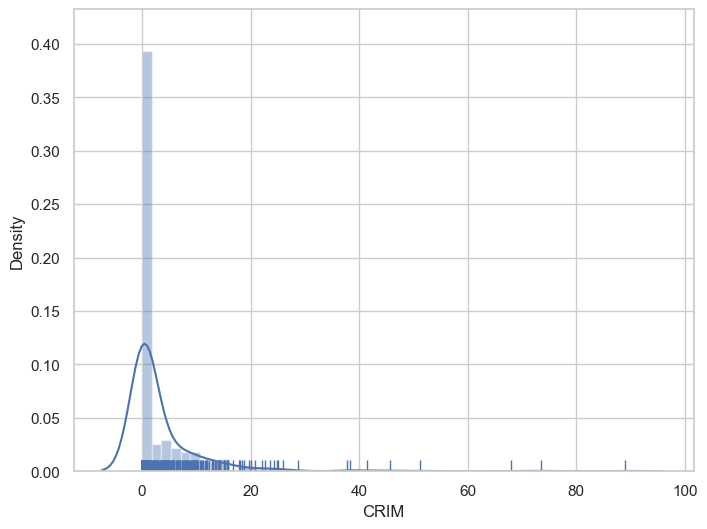

In [12]:
plt.figure(figsize=(8, 6))
sb.distplot(boston['CRIM'], rug = True)
plt.savefig('../images/crim.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['ZN'], rug = True)
plt.savefig('../images/zn.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['INDUS'], rug = True)
plt.savefig('../images/indus.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['CHAS'], rug = True)
plt.savefig('../images/chas.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['NOX'], rug = True)
plt.savefig('../images/nox.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['RM'], rug = True)
plt.savefig('../images/rm.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['AGE'], rug = True)
plt.savefig('../images/age.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['DIS'], rug = True)
plt.savefig('../images/dis.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['RAD'], rug = True)
plt.savefig('../images/rad.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['TAX'], rug = True)
plt.savefig('../images/tax.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['PTRATIO'], rug = True)
plt.savefig('../images/ptration.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['B'], rug = True)
plt.savefig('../images/b.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['LSTAT'], rug = True)
plt.savefig('../images/lstat.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['MEDV'], rug = True)
plt.savefig('../images/medv.png')

# Feature Observation

KeyboardInterrupt: 

<Figure size 200x200 with 0 Axes>

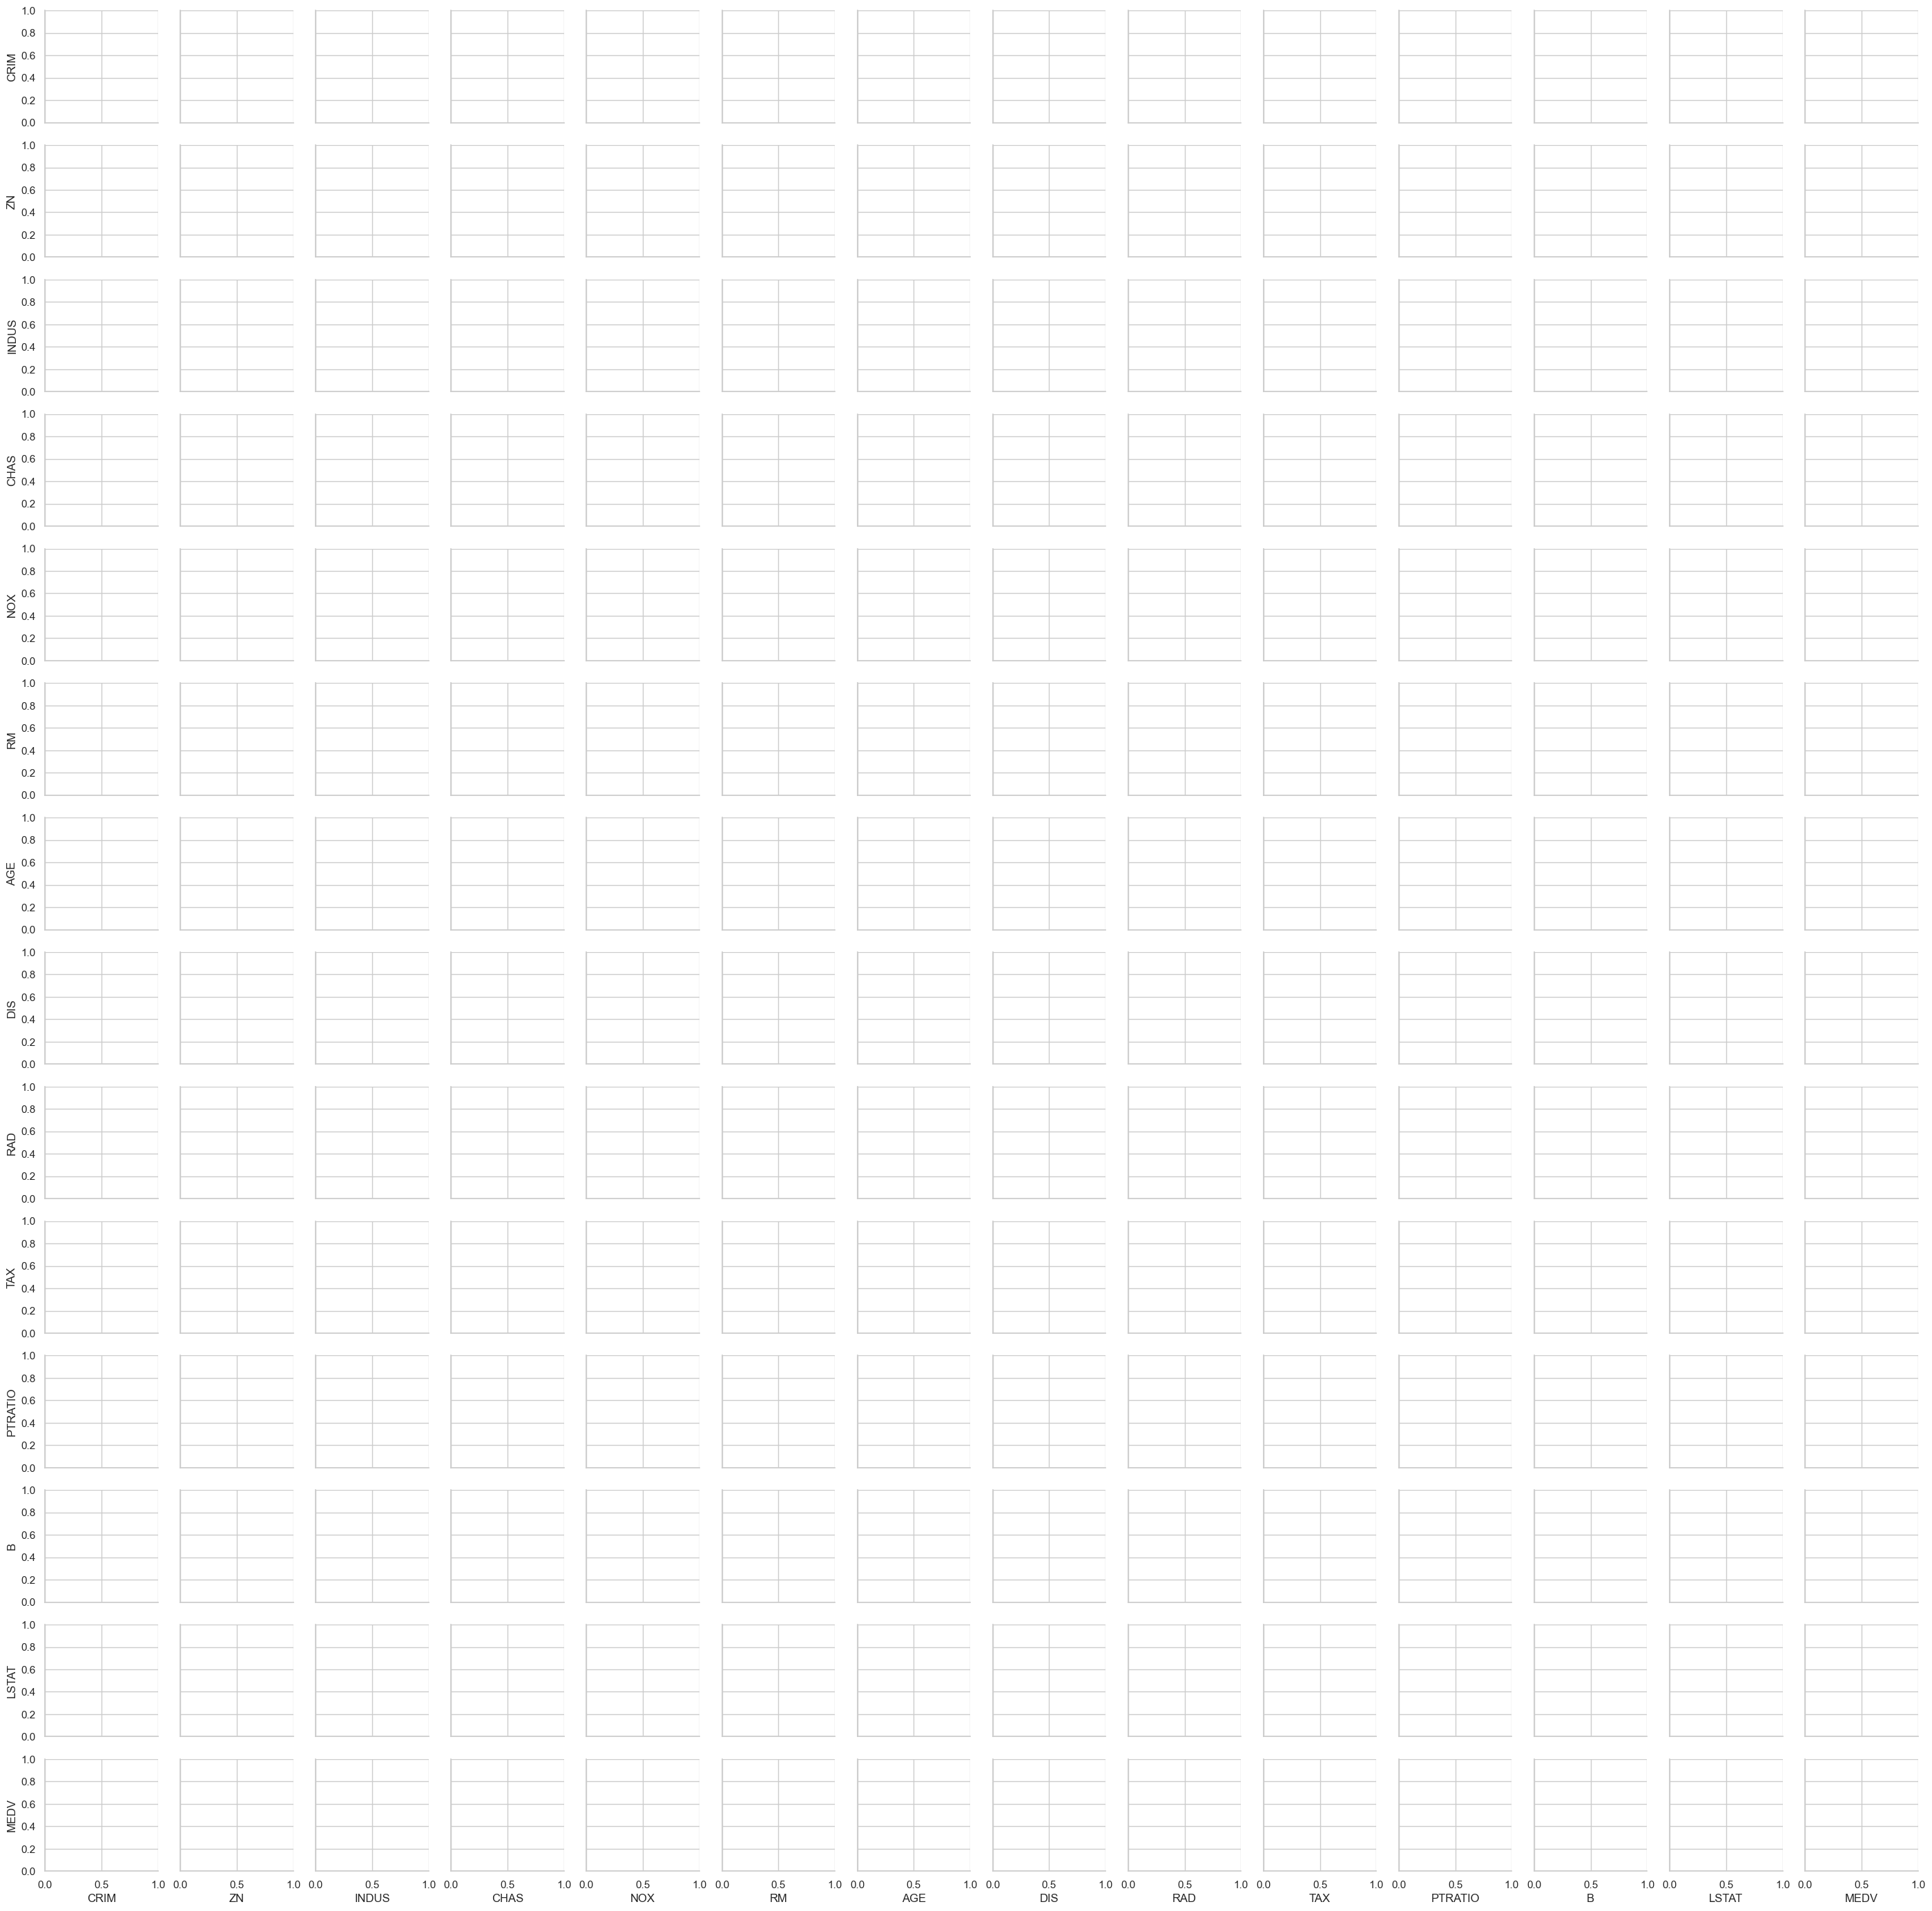

In [14]:
plt.figure(figsize  = (2, 2))
sb.pairplot(boston)
plt.savefig('../images/pairplot.png')

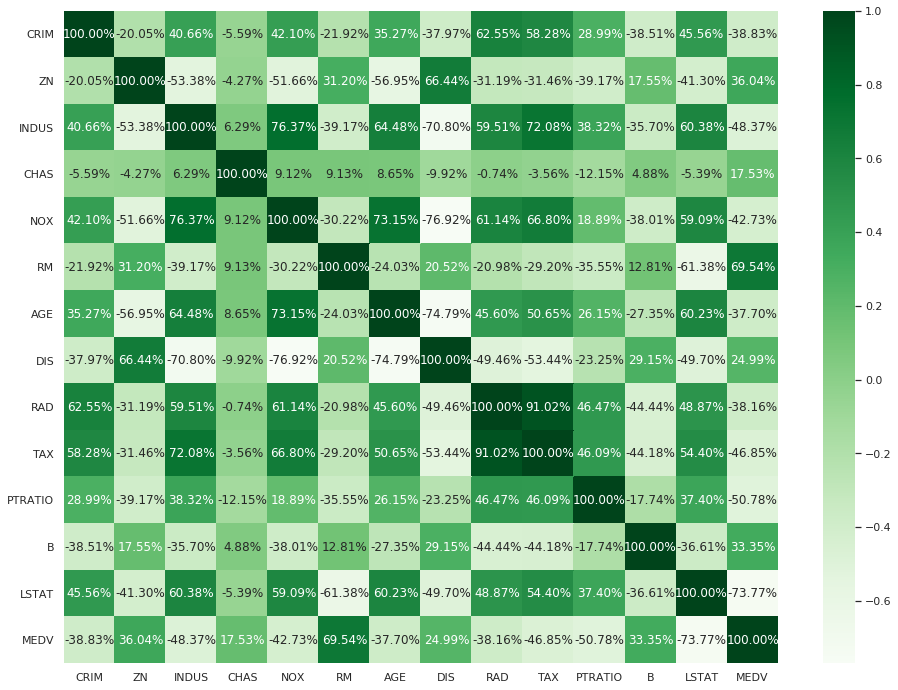

In [8]:
# TODO : Visualizing Feature Correlation
plt.figure(figsize = (16, 12))
sb.heatmap(boston.corr(), cmap = 'Greens', annot = True, fmt = '.2%')
plt.savefig('../images/features_correlation.png')

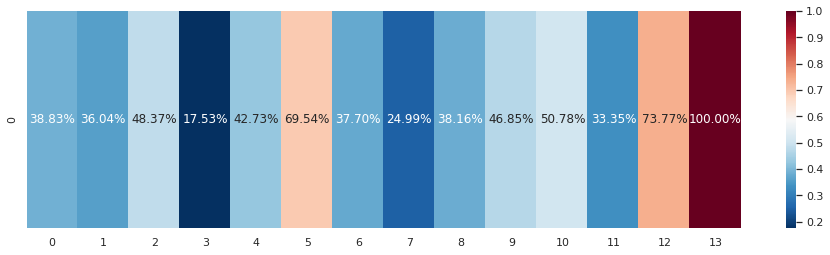

In [9]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston.corrwith(boston['MEDV'])

plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.savefig('../images/correlation_with_price.png')

In [10]:
# Let's see the features having more correlation
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

In [11]:
# Let's confirm this by using ExtraTreesRegressor
# TODO : To know the feature Importances
y = boston['MEDV'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(boston.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = boston.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        2.923965
ZN          0.407612
INDUS       3.911079
CHAS        1.599084
NOX         3.974996
RM         33.497965
AGE         1.820047
DIS         2.984446
RAD         1.990202
TAX         3.886847
PTRATIO     5.909181
B           1.938884
LSTAT      35.155692
dtype: float64

In [12]:
# Feature Impotances by ExtraTressRegressor
important_features.sort_values(ascending = False)

LSTAT      35.155692
RM         33.497965
PTRATIO     5.909181
NOX         3.974996
INDUS       3.911079
TAX         3.886847
DIS         2.984446
CRIM        2.923965
RAD         1.990202
B           1.938884
AGE         1.820047
CHAS        1.599084
ZN          0.407612
dtype: float64

In [13]:
# Feature Impotances by Correlation Matrix
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

### It says same approximately

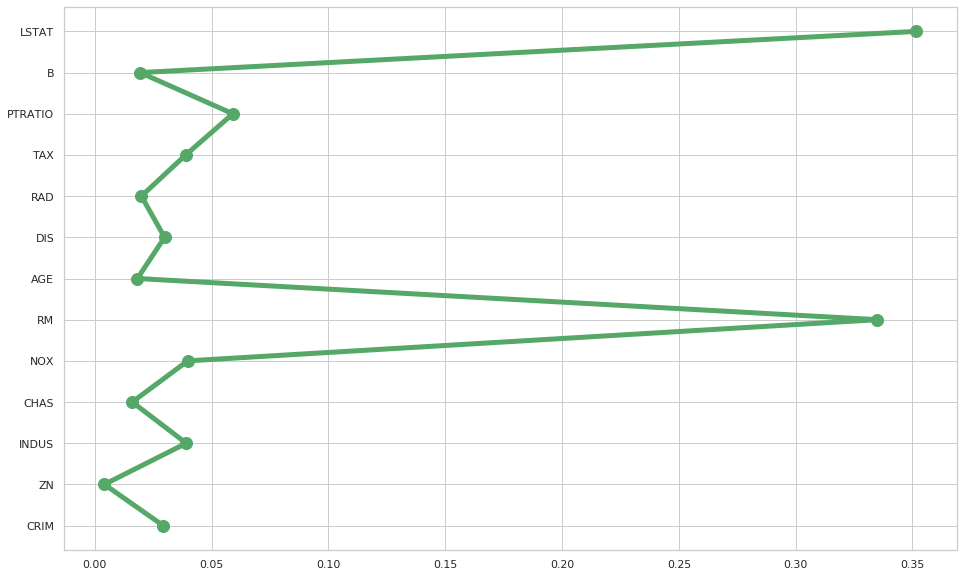

In [14]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, boston.columns[:-1], 'go-', linewidth=5, markersize=12)
plt.savefig('../images/feature_importances.png')

### From the above feature observations, we found that some columns are most important such as LSTAT and RM

# Building Machine Learning Model

In [15]:
# Arranging features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'PTRATIO', 'NOX', 'INDUS', 'TAX', 'DIS', 'CRIM', 'RAD',
       'B', 'AGE', 'CHAS', 'ZN'],
      dtype='object')

In [16]:
y = boston.loc[:, 'MEDV'].values

In [17]:
# Arranging columns based on features importance
new_boston = boston[features_arranged_on_importance]
new_boston.head()

,LSTAT,RM,PTRATIO,NOX,INDUS,TAX,DIS,CRIM,RAD,B,AGE,CHAS,ZN
0,4.98,6.575,15.3,0.538,2.31,296.0,4.0900,0.00632,1,396.90,65.2,0,18.0
1,9.14,6.421,17.8,0.469,7.07,242.0,4.9671,0.02731,2,396.90,78.9,0,0.0
2,4.03,7.185,17.8,0.469,7.07,242.0,4.9671,0.02729,2,392.83,61.1,0,0.0
3,2.94,6.998,18.7,0.458,2.18,222.0,6.0622,0.03237,3,394.63,45.8,0,0.0
4,5.33,7.147,18.7,0.458,2.18,222.0,6.0622,0.06905,3,396.90,54.2,0,0.0


In [25]:
# Getting boston values
X = new_boston.values
X = X[:, :6]

# TODO : Splitting data as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

<br><br><br><br><br><br><br>

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.6906984575653774
Testing Score  :  0.6209548378098407
R2 Score :  0.6209548378098407
MSE :  27.796815732022583


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.6906984575653774
Testing Score  :  0.6209548378098446
R2 Score :  0.6209548378098446
MSE :  27.7968157320223


<br><br><br><br><br><br><br>

## Decision Tree Regression

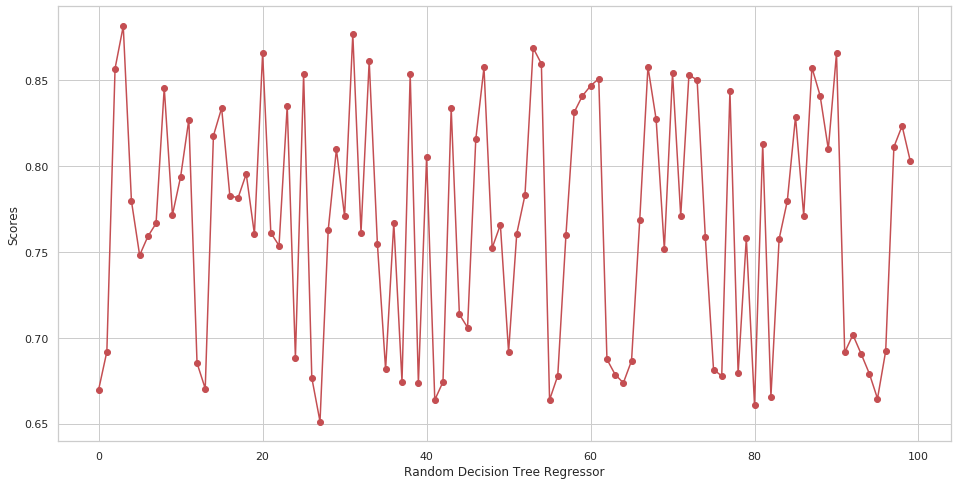

In [30]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.savefig('../images/random_decision_tree_regressor.png')
plt.show()

#### See how the decision tree score changes for different random states

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.8815969829691199
R2 Score :  0.8815969829691199
MSE :  8.682941176470589


In [79]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))


Training Score :  0.9960886512531352
Testing Score  :  0.8500046263359538
R2 Score :  0.8500046263359538
MSE :  10.999728207330786


<br><br><br><br><br><br><br>

## Random Forest Regression

In [87]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))


Training Score :  0.9560507818314905
Testing Score  :  0.8584494627144632
R2 Score :  0.8584494627144632
MSE :  10.380436407524767


# Different Models Accuracy

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.6209548378098407
Decision Tree Regression : 
Score :  0.8815969829691199
Random Forest Regression : 
Score :  0.8584494627144632
k Neighbors Regression : 
Score :  0.6094868472810563


# Building optimal Random Regression Model

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 46)

print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, y))

Random Forest Regression : 
Score :  0.944479365914758


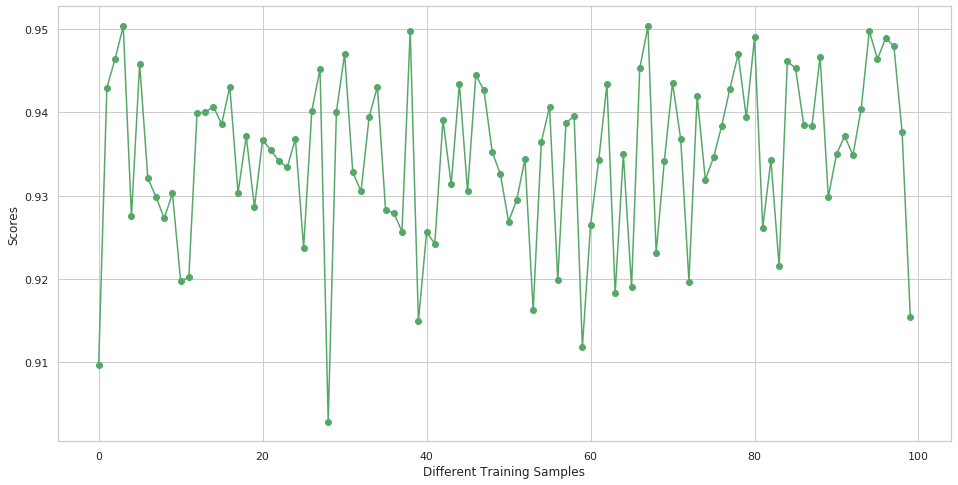

In [93]:
# Scores for different training samples
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.savefig('../images/random_forest_diff_train_samples.png')
plt.show()

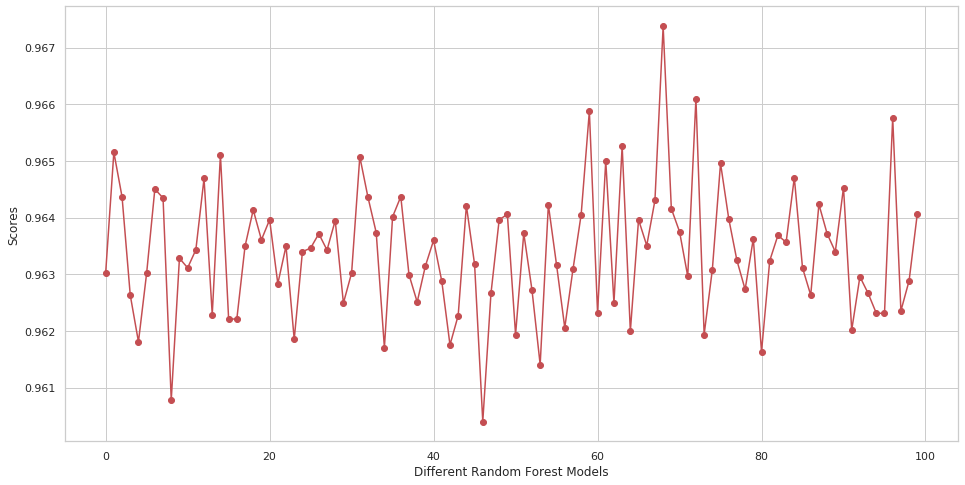

In [96]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.savefig('../images/random_forest_diff_RF_models.png')
plt.show()

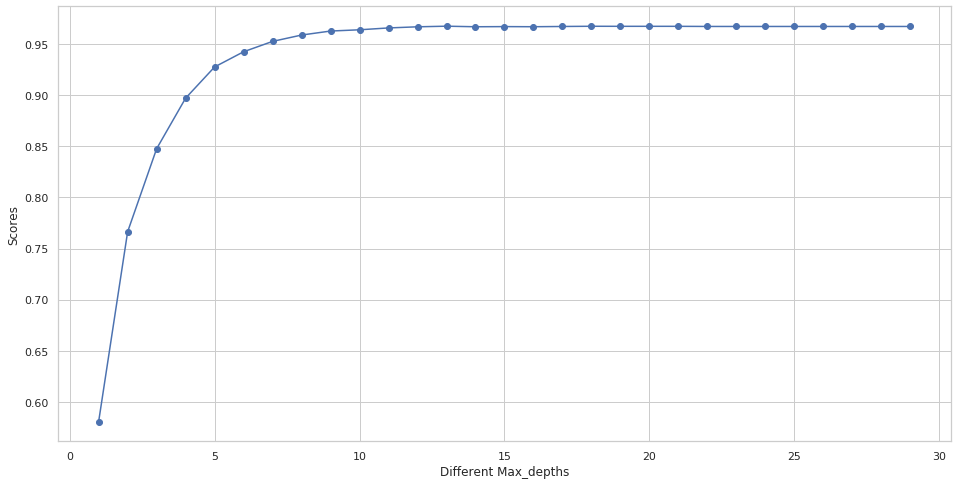

In [98]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.savefig('../images/random_forest_diff_max_depth.png')
plt.show()

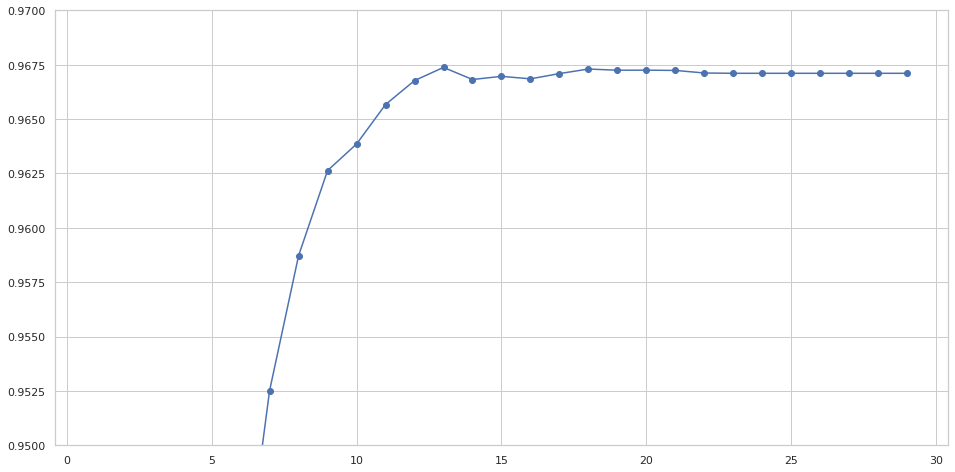

In [99]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.show()

From this, we are going to choose,
- random_state = 3, for choosing random Training samples
- random_state = 68, for random Random forest regressor
- max_depth = 13, for Max Depths in random forest regressor

# Building Optimal Model

In [100]:
# Choosing Optimal Training Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

# Building Optimal Random Forest regressor Model
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=68, verbose=0, warm_start=False)

In [101]:
random_forest_regressor.score(X, y)

0.9673793783596027

In [102]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Training Accuracy :  0.9789853943215869
Testing Accuracy  :  0.9202169918339218


In [103]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))

Mean Squared Error :  6.602427120371769
Root Mean Squared Error :  2.569518849974012
Score :  0.9673793783596027


#### Finally we finishes the project. We have built a Random Forest Regressor Model which performs well with top 6 features and having the Training accuracy of 97.89% and Testing accuracy of 96.73%.

#### Thank you Everyone for reading my notebook.

#### If you love my work, kindly give a Star to my repository.
#### Facing any issues, feel free to post your issues on my GitHub.

I have made a project on Boston house price prediction, it has 14 features about a house and I have to predict the price. This project was started as a motivation for learning Machine Learning Algorithms and to learn the different data preprocessing techniques such as Exploratory Data Analysis, Feature Engineering, Feature Selection, Feature Scaling and finally to build a machine learning model. First I did Exploratory Data Analysis using heat-maps, correlation and feature importance. Linear regression, Decision Tree regression and random forest regression.  Then used random regression model. We have built a Random Forest Regressor Model which performs well with top 6 features and having the Training accuracy of 97.89% and Testing accuracy of 96.73%.
